# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [3]:
%pip install --upgrade plotly

     |████████████████████████████████| 28.8 MB 85.0 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import iso3166 as iso

# These might be helpful:

from datetime import datetime, timedelta

In [5]:
pip install iso3166

### Link to google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Notebook Presentation

In [7]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [8]:
df_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python_100_days/day098/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
#What is the shape of df_data?
df_data.shape

(4324, 9)

In [10]:
#What is the shape of df_data?/ What are the column names?
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


There are 9 columns with 4324 entries.

In [11]:
#Are there any NaN values or duplicates?
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')


Any NaN values? True
Any duplicates? False


In [12]:
#Covert the data type Price
df_data['Price'] = df_data['Price'].astype(str).str.replace(',', "")
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

In [13]:
#fix the date. 
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['year'] = df_data['date'].apply(lambda datetime: datetime.year)
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

In [ ]:
#Add Year group for cold war 

df_data.loc[df_data['year'] < 1992, 'year_group'] = 'Before 1991'  
df_data.loc[df_data['year'] > 1991, 'year_group'] = 'After 1991'


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [14]:
df_data_clean = df_data

In [15]:
#check duplicated rows
duplicated_rows = df_data_clean[df_data.duplicated()]
print(duplicated_rows) 

Empty DataFrame
Columns: [Unnamed: 0, Unnamed: 0.1, Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status, date, year, month]
Index: []


The output should be empty, as there is no duplicated row.

In [16]:
df_data_clean = df_data_clean.drop_duplicates()

In [17]:
df_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4324 non-null   int64  
 1   Unnamed: 0.1    4324 non-null   int64  
 2   Organisation    4324 non-null   object 
 3   Location        4324 non-null   object 
 4   Date            4324 non-null   object 
 5   Detail          4324 non-null   object 
 6   Rocket_Status   4324 non-null   object 
 7   Price           964 non-null    float64
 8   Mission_Status  4324 non-null   object 
 9   date            4324 non-null   object 
 10  year            4324 non-null   int64  
 11  month           4324 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 439.2+ KB


In [18]:
#No of missing items
df_data.isna().sum()
# df_data_clean  = df_data_clean.dropna() 

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
date                 0
year                 0
month                0
dtype: int64

The price item contain more than 3360 column is n/a. To remove the items wont be correct. 


## Descriptive Statistics

In [65]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1,Price,year,month
count,"4,324.00","4,324.00",964.00,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50",153.79,"1,987.39",6.75
std,"1,248.38","1,248.38",288.45,18.07,3.42
min,0.00,0.00,5.30,"1,957.00",1.00
25%,"1,080.75","1,080.75",40.00,"1,972.00",4.00
50%,"2,161.50","2,161.50",62.00,"1,984.00",7.00
75%,"3,242.25","3,242.25",164.00,"2,002.00",10.00
max,"4,323.00","4,323.00","5,000.00","2,020.00",12.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [22]:
company_ = df_data_clean.Organisation.value_counts()

In [23]:
h_bar = px.bar(
        y = company_.values,
        x = company_.index,
        # orientation='h',
        title='Number of Launches per Company')

h_bar.update_layout(xaxis_title='Company', yaxis_title='Number of Launches')
h_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [24]:
rockets_ = df_data_clean.Rocket_Status.value_counts()

In [25]:
rockets_

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

<BarContainer object of 2 artists>

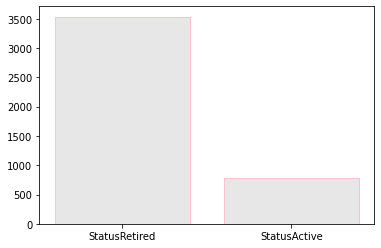

In [26]:
plt.bar(rockets_.index, rockets_.values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='pink')

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [27]:
mission_ = df_data_clean.Mission_Status.value_counts()

In [28]:
mission_ 

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [29]:
df_data_clean['Price'].describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

In [30]:
#To put the mean onto the graph title 
"{:.2f}".format(df_data_clean['Price'].mean())



'153.79'

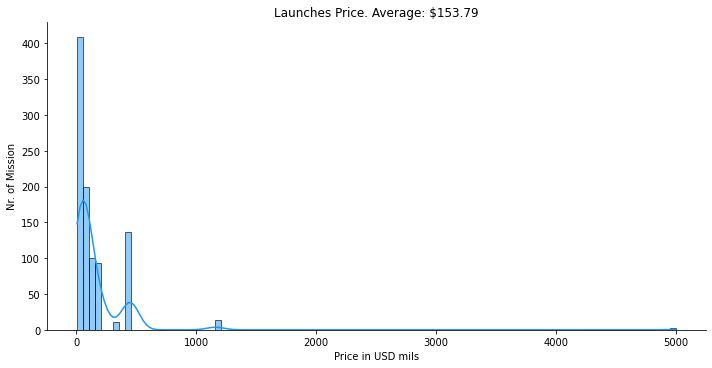

In [31]:
sns.displot(df_data_clean['Price'], 
            bins=100, 
            aspect=2,
            kde=True, 
            color='#2196f3')
mean_ = "{:.2f}".format(df_data_clean['Price'].mean())
plt.title(f"Launches Price. Average: ${mean_}")
plt.xlabel('Price in USD mils')
plt.ylabel('No. of Mission')

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [32]:
#Country info is in the Location column 
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]

In [33]:
#Based on the question info. 
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"


In [35]:
#Look Up table from iso3166 for the country and Aplha 3 code
countries = {country.name: key for key, country in iso.countries_by_alpha3.items()}

In [36]:
#Update the df_data country column to 3 dig code.
df_data = df_data.replace({"Country": countries})

In [38]:
df_data["Country"].value_counts()

RUS              2099
USA              1351
FRA               303
CHN               269
JPN               126
IND                76
Pacific Ocean      36
IRN                14
NZL                13
ISR                11
KEN                 9
AUS                 6
PRK                 5
KOR                 3
BRA                 3
Name: Country, dtype: int64

In [39]:
launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.head()

,Country,counts
0,RUS,2099
1,USA,1351
2,FRA,303
3,CHN,269
4,JPN,126


# Use a Choropleth Map to Show the Number of Failures by Country


In [40]:
df_data_failure = df_data[(df_data['Mission_Status'] != 'Success')]


In [41]:
failure_table = df_data_failure.Country.value_counts()
print(failure_table)

RUS              186
USA              163
CHN               25
FRA               18
IND               13
JPN               13
IRN                9
Pacific Ocean      3
PRK                3
BRA                3
AUS                3
NZL                2
KOR                2
ISR                2
Name: Country, dtype: int64


In [42]:
map = px.choropleth(failure_table, locations=failure_table.index, color=failure_table.values)
  
map.update_layout(coloraxis_showscale=True) 
map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [43]:
#Count item group by ["Country", "Organisation", "Mission_Status"]
df_data_statues= df_data.groupby(["Country", "Organisation", "Mission_Status"], as_index=False).size()
print (df_data_statues)

    Country  Organisation   Mission_Status  size
0       AUS          AMBA          Success     1
1       AUS        CECLES          Failure     2
2       AUS        CECLES          Success     1
3       AUS           RAE          Failure     1
4       AUS           RAE          Success     1
..      ...           ...              ...   ...
118     USA  US Air Force          Success   129
119     USA       US Navy          Failure    14
120     USA       US Navy  Partial Failure     1
121     USA       US Navy          Success     2
122     USA  Virgin Orbit          Failure     1

[123 rows x 4 columns]


In [44]:
px.sunburst(df_data_statues
            ,path=["Country", "Organisation", "Mission_Status"]
            ,values="size"
            ,title="Missions By Country")

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [45]:
print(f'Please note {df_data.Price.isna().sum()} records do not contain Price information, the analysis will be excluding these information.')

Please note 3360 records do not contain Price information, the analysis will be excluding these information.


In [46]:
# df_data.info()
spent_ = df_data_clean.groupby("Organisation")["Price"].sum().sort_values(ascending=False)
print(spent_)

Organisation
NASA               76,280.00
Arianespace        16,345.00
ULA                14,798.00
RVSN USSR          10,000.00
CASC                6,340.26
SpaceX              5,444.00
Northrop            3,930.00
MHI                 3,532.50
ISRO                2,177.00
US Air Force        1,550.92
VKS RF              1,548.90
ILS                 1,320.00
Boeing              1,241.00
Roscosmos           1,187.50
Martin Marietta       721.40
Kosmotras             638.00
Eurockot              543.40
Lockheed              280.00
JAXA                  168.00
Rocket Lab             97.50
ESA                    37.00
ExPace                 28.30
EER                    20.00
Sandia                 15.00
Virgin Orbit           12.00
SRC                     0.00
Yuzhmash                0.00
RAE                     0.00
OneSpace                0.00
OKB-586                 0.00
US Navy                 0.00
Sea Launch              0.00
UT                      0.00
Starsem                 0.00
A

# Analyse the Amount of Money Spent by Organisation per Launch

In [47]:
avg_spent_ = df_data.groupby("Organisation")["Price"].mean().sort_values(ascending=False)
print(avg_spent_)

Organisation
RVSN USSR          5,000.00
NASA                 511.95
Boeing               177.29
Arianespace          170.26
ULA                  151.00
ILS                  101.54
MHI                   95.47
Martin Marietta       80.16
US Air Force          59.65
JAXA                  56.00
SpaceX                54.99
Roscosmos             51.63
Northrop              47.35
VKS RF                46.94
Eurockot              41.80
CASC                  40.13
ESA                   37.00
Lockheed              35.00
ISRO                  32.49
Kosmotras             29.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Rocket Lab             7.50
AEB                     NaN
AMBA                    NaN
ASI                     NaN
Arm??e de l'Air         NaN
Blue Origin             NaN
CASIC                   NaN
CECLES                  NaN
CNES                    NaN
Douglas                 NaN
Exos                    NaN
General

# Chart the Number of Launches per Year

In [49]:
year_ = df_data.year.value_counts().rename_axis('year').reset_index(name='counts')
print(year_)

    year  counts
0   1971     119
1   2018     117
2   1977     114
3   1975     113
4   1976     113
..   ...     ...
59  2010      37
60  2005      37
61  1958      28
62  1959      20
63  1957       3

[64 rows x 2 columns]


In [50]:
bar = px.bar(
        x = year_.year, 
        y = year_.counts, # count
        title='Number of Launches per Year',
        color=year_.year,
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)

bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [51]:
month_ = df_data.month.value_counts().rename_axis('month').reset_index(name='counts')
print(month_)

    month  counts
0      12     450
1       6     402
2       4     383
3      10     381
4       8     373
5       9     365
6       3     353
7       7     351
8       2     336
9      11     336
10      5     326
11      1     268


In [52]:
bar = px.bar(
        x = month_.month, 
        y = month_.counts, # count
        title='Number of Launches month-on-month',
        color=month_.counts,
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Months',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)

bar.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [53]:
month_.min()

month       1
counts    268
dtype: int64

In [54]:
month_.max()

month      12
counts    450
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [56]:
price_sum_ = df_data.groupby(['year'])['Price'].mean()

In [57]:
print(price_sum_)

year
1957     NaN
1958     NaN
1959     NaN
1960     NaN
1961     NaN
        ... 
2016   79.46
2017   69.49
2018   64.75
2019   59.61
2020   56.65
Name: Price, Length: 64, dtype: float64


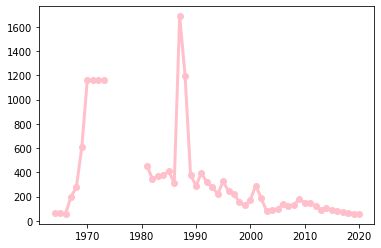

In [58]:
plt.plot(price_sum_.index, price_sum_.values, color='pink', linewidth=3, marker='o')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [59]:
#to find the top 10 Org over the year and create a filter list for the main dataset. 
company_year_top10 = df_data.groupby('Organisation', as_index=False).size().sort_values('size', ascending=False)[:10]
company_year_top10 
# company_year_.sort_values('size', ascending=False)[:10]
# .sort_values(ascending=False)
# df.groupby(['A', 'B']

,Organisation,size
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


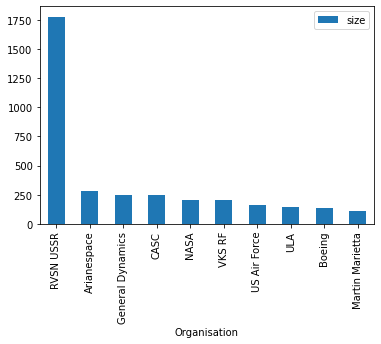

In [60]:
company_year_top10.plot(x = 'Organisation', y='size', kind='bar')

In [61]:
top10_ = df_data[df_data.Organisation.isin(company_year_top10.Organisation)]

In [62]:
top10_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513 entries, 1 to 4323
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3513 non-null   int64  
 1   Unnamed: 0.1    3513 non-null   int64  
 2   Organisation    3513 non-null   object 
 3   Location        3513 non-null   object 
 4   Date            3513 non-null   object 
 5   Detail          3513 non-null   object 
 6   Rocket_Status   3513 non-null   object 
 7   Price           578 non-null    float64
 8   Mission_Status  3513 non-null   object 
 9   date            3513 non-null   object 
 10  year            3513 non-null   int64  
 11  month           3513 non-null   int64  
 12  Country         3513 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 384.2+ KB


In [75]:
top10_graph = top10_.groupby(['Organisation','year'])['Detail'].count().rename_axis(['Org', 'year']).reset_index(name='counts')
print(top10_graph)


             Org  year  counts
0    Arianespace  1984       3
1    Arianespace  1985       4
2    Arianespace  1986       3
3    Arianespace  1987       2
4    Arianespace  1988       6
..           ...   ...     ...
318       VKS RF  2016       4
319       VKS RF  2017       6
320       VKS RF  2018       5
321       VKS RF  2019       8
322       VKS RF  2020       3

[323 rows x 3 columns]


In [78]:
line = px.line(top10_graph, 
               x='year', 
               y= 'counts',
               color='Org',
               title='Number of Launches over Time by the Top 10 Organisations')

line.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [79]:
df_data.loc[df_data['year'] < 1992, 'year_group'] = 'Before 1991'  
df_data.loc[df_data['year'] > 1991, 'year_group'] = 'After 1991'

In [82]:
cold_war_ =df_data.year_group.value_counts()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [86]:
cold_war_2_ = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]
cold_war_pie_ = cold_war_2_.Country.value_counts()


In [87]:
fig = px.pie(labels=cold_war_pie_.index, 
             values=cold_war_pie_.values,
             title="number of launches of the USSR and the USA",
             names=cold_war_pie_.index,
            #  hole=0.6, # makes a donut chart =) 
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [90]:
cold_war_2_trend_ = cold_war_2_.groupby(['Country','year'])['Detail'].count().rename_axis(['Country','year']).reset_index(name='counts')

In [91]:
line = px.line(cold_war_2_trend_, 
               x='year', 
               y= 'counts',
               color='Country',
               title='Total Number of Launches Year-On-Year by the Two Superpowers')

line.show()


## Chart the Total Number of Mission Failures Year on Year.

In [94]:
df_data_failure_trent_ = df_data_failure.groupby(['year'])['Detail'].count().rename_axis(['year']).reset_index(name='counts')

In [95]:
line = px.line(df_data_failure_trent_ , 
               x='year', 
               y= 'counts',
               title='Total Number of Mission Failures Year on Year.')

line.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [98]:
# year_
failure_merged_df = pd.merge(year_, df_data_failure_trent_, on='year', how="inner")

In [102]:
failure_merged_df = failure_merged_df.rename(columns={'counts_x': 'total', 'counts_y': 'failures'})
print(failure_merged_df.head())

failure_merged_df['pct'] = failure_merged_df['failures'] /failure_merged_df['total'] 

   year  total  failures
0  1971    119        14
1  2018    117         4
2  1977    114         4
3  1975    113         6
4  1976    113         5


In [111]:
failure_merged_df['pct'] = failure_merged_df['failures'] /failure_merged_df['total'] *100
print(failure_merged_df.head())

   year  total  failures   pct
0  1971    119        14 11.76
1  2018    117         4  3.42
2  1977    114         4  3.51
3  1975    113         6  5.31
4  1976    113         5  4.42


In [112]:
line = px.line(failure_merged_df.sort_values('year', ascending=True) , 
               x='year', 
               y= 'pct',
               title='Percentage of Failures over Time')

line.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [115]:
year_country_ = df_data.groupby(['Country','year'])['Detail'].count().rename_axis(['Country','year']).reset_index(name='counts')

In [119]:
year_country_['RN'] = year_country_.sort_values(['counts'], ascending=[False]) \
             .groupby(['year']) \
             .cumcount() + 1

In [124]:
year_country_graph_ = year_country_[(year_country_['RN']  == 1)].sort_values(['year'], ascending=[True])

,Country,year,counts,RN
240,RUS,1957,2,1
305,USA,1958,23,1
306,USA,1959,16,1
307,USA,1960,30,1
308,USA,1961,43,1


In [126]:
bar = px.bar(
        x = year_country_graph_.year, 
        y = year_country_graph_.counts, # count
        title='Country was in the Lead in terms of Total Number of Launches',
        color=year_country_graph_.Country,
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)

bar.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [127]:
year_Organisation_ = df_data.groupby(['Organisation','year'])['Detail'].count().rename_axis(['Organisation','year']).reset_index(name='counts')

In [128]:
year_Organisation_['RN'] = year_Organisation_.sort_values(['counts'], ascending=[False]) \
             .groupby(['year']) \
             .cumcount() + 1

In [129]:
year_Organisation_graph_ = year_Organisation_[(year_Organisation_['RN']  == 1)].sort_values(['year'], ascending=[True])

In [131]:
bar = px.bar(
        x = year_Organisation_graph_.year, 
        y = year_Organisation_graph_.counts, # count
        title='Organisation was in the Lead in terms of Total Number of Launches',
        color=year_Organisation_graph_.Organisation,
        color_continuous_scale='Agsunset'
)

bar.update_layout(xaxis_title='Year',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)

bar.show()